In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class AdalineMultiOutput:
    def __init__(self, input_size, output_size, learning_rate=0.001, epochs=500):
        """
        Initializes the ADALINE network with multiple outputs.

        Parameters:
        - input_size: Number of inputs (excluding the bias).
        - output_size: Number of outputs (signals to recover).
        - learning_rate: Learning rate for weight updates.
        - epochs: Number of iterations over the training set.
        """
        # Initialize weights: one row for each output, including the bias
        self.weights = np.zeros((output_size, input_size + 1))
        self.learning_rate = learning_rate
        self.epochs = epochs
        # Error vector
        self.errors = []

    def predict(self, x):
        """
        Makes a prediction for a single input sample.

        Parameters:
        - x: Input vector.

        Returns:
        - Predicted output vector.
        """
        x = np.insert(x, 0, 1)  # Insert bias term
        return np.dot(self.weights, x)  # Dot product for each output

    def train(self, X, D):
        """
        Trains the ADALINE network using the provided dataset.

        Parameters:
        - X: Input matrix (n_samples, input_size).
        - D: Desired output matrix (n_samples, output_size).
        """

        for epoch in range(self.epochs):
            # Compute mean squared error (MSE)
            mse_ = 0
            for i in range(len(X)):
                x_i = np.insert(X[i], 0, 1)  # Insert bias term
                y = np.dot(self.weights, x_i)  # Current prediction
                error = D[i] - y  # Prediction error
                # Compute MSE
                mse_ += sum(error ** 2)
                #print("Error:", error.shape)
                #print("inputs ", x_i.shape)
                # Update weights for each output
                self.weights += 2 * self.learning_rate * np.outer(error, x_i)

            self.errors.append(np.mean(mse_))
            # Optional: print average error every few epochs
            if (epoch + 1) % 20 == 0:
                y_pred = self.predict_batch(X)
                mse = np.mean((D - y_pred) ** 2)
                self.errors.append(mse)
                print(f"Epoch {epoch + 1}/{self.epochs}, MSE: {mse:.5f}")

    def predict_batch(self, X):
        """
        Makes predictions for a set of input samples.

        Parameters:
        - X: Input matrix (n_samples, input_size).

        Returns:
        - Predicted output matrix (n_samples, output_size).
        """
        X_bias = np.insert(X, 0, 1, axis=1)  # Insert bias term into all samples
        return np.dot(X_bias, self.weights.T)  # Dot product for all outputs

In [3]:
# Signal parameters
n_samples = 1000
t = np.linspace(0, 2 * np.pi, n_samples)

# Create three sine signals with different frequencies and amplitudes
A1 = 1
A2 = 0.5
A3 = 0.2
w1 = 2 * np.pi * 1
w2 = 2 * np.pi * 3
w3 = 2 * np.pi * 5

signal1 = A1 * np.sin(w1 * t)  # Amplitude 1.0, Frequency 1 Hz
signal2 = A2 * np.sin(w2 * t)  # Amplitude 0.5, Frequency 3 Hz
signal3 = A3 * np.sin(w3 * t)  # Amplitude 0.2, Frequency 5 Hz

# Create the composite signal
composite_signal = signal1 + signal2 + signal3

# Add noise to the composite signal
#np.random.seed(42)  # For reproducibility
#noise = np.random.normal(0, 0.1, n_samples)
noisy_composite_signal = composite_signal #+ noise

In [4]:
# ADALINE configuration
delay = 40  # Number of delays (taps) for the input, experiment with different values
X = np.array([noisy_composite_signal[i:i + delay] for i in range(n_samples - delay)])
# Original delayed signals to align with X
d1 = signal1[delay:]
d2 = signal2[delay:]
d3 = signal3[delay:]
D = np.stack((d1, d2, d3), axis=1)  # Desired output matrix (n_samples - delay, 3)

In [5]:
# Create and train the multi-output ADALINE network
adaline = AdalineMultiOutput(input_size=delay, output_size=3, learning_rate=0.001, epochs=100)
adaline.train(X, D)

# Recover the signals using the trained ADALINE network
recovered_signals = adaline.predict_batch(X)  # Recovered output matrix (n_samples - delay, 3)
recovered_signal1 = recovered_signals[:, 0]
recovered_signal2 = recovered_signals[:, 1]
recovered_signal3 = recovered_signals[:, 2]

Epoch 20/100, MSE: 0.02749
Epoch 40/100, MSE: 0.02155
Epoch 60/100, MSE: 0.01653
Epoch 80/100, MSE: 0.01257
Epoch 100/100, MSE: 0.00954


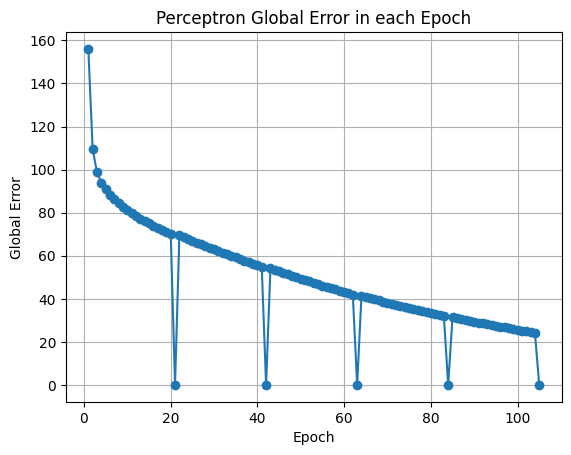

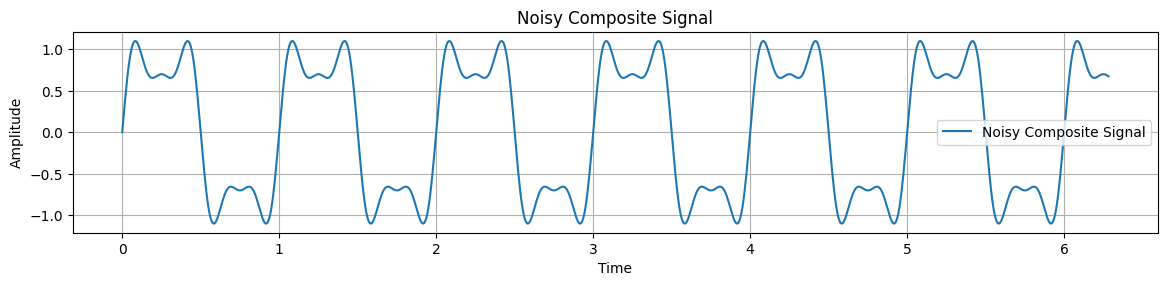

In [6]:
# Plot MSE over the epochs
plt.figure()
plt.plot(range(1, len(adaline.errors) + 1), adaline.errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Global Error')
plt.title('Perceptron Global Error in each Epoch')
plt.grid(True)

# Plot the original signals, noisy composite signal, and recovered signals
plt.figure(figsize=(14, 12))

# Noisy composite signal
plt.subplot(4, 1, 1)
plt.plot(t, noisy_composite_signal, label="Noisy Composite Signal")
plt.title("Noisy Composite Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

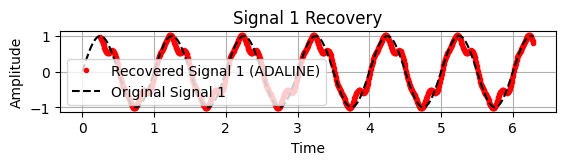

In [7]:
# Signal 1: Original vs Recovered
plt.subplot(4, 1, 2)
plt.plot(t[delay:], recovered_signal1, '.',label="Recovered Signal 1 (ADALINE)", color="r")
plt.plot(t, signal1, '--', label="Original Signal 1", color="k")
plt.title("Signal 1 Recovery")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

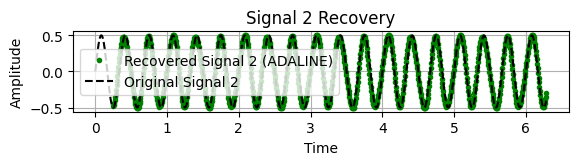

In [8]:
# Signal 2: Original vs Recovered
plt.subplot(4, 1, 3)
plt.plot(t[delay:], recovered_signal2, '.',label="Recovered Signal 2 (ADALINE)", color="g")
plt.plot(t, signal2, '--', label="Original Signal 2", color="k")
plt.title("Signal 2 Recovery")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

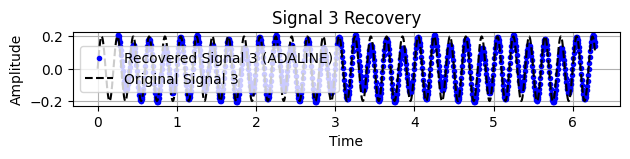

In [9]:
# Signal 3: Original vs Recovered
plt.subplot(4, 1, 4)
plt.plot(t[delay:], recovered_signal3,'.', label="Recovered Signal 3 (ADALINE)", color="b")
plt.plot(t, signal3, '--', label="Original Signal 3", color="k")
plt.title("Signal 3 Recovery")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()